In [3]:
import pandas as pd 
import numpy as np
import json
from ast import literal_eval
from collections import defaultdict
import datetime
import nltk
nltk.download("all")
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from math import ceil,isnan
import matplotlib.pyplot as plt
import seaborn as sns
import os

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package cess_cat is already up-

[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/shashankp/nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/shashankp/nltk_data...
[n

[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


# Data Processing

In [4]:
path = '/Users/shashankp/Desktop/Data Mining/Final Project/'
movie_dataset_path = os.path.join(path,'the-movies-dataset')
movie_metadata = pd.read_csv(os.path.join(movie_dataset_path,'movies_metadata.csv'))
keywords = pd.read_csv(os.path.join(movie_dataset_path,'keywords.csv'))
movie_metadata.drop(['homepage','belongs_to_collection','poster_path','imdb_id',
                     'original_title'],axis=1,inplace=True)
movie_metadata.head()

/Users/shashankp/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Helper Functions 

In [5]:
def get_col(row,col_name):
    # get_col function, when given a row in a dataframe
    # retrieves a column's value for that particular row
    if(col_name == 'genres'):
        return row.genres
    elif(col_name == 'production_countries'):
        return row.production_countries
    elif(col_name == 'production_companies'):
        return row.production_companies
    elif(col_name == 'keywords'):
        return row.keywords
    else:
        return row.spoken_languages

def convert_to_list(df,col_name):
    # Fill nan values with stringfied empty list and 
    # apply literal_eval to convert string objects to 
    # lists for preprocessing
    df[col_name].fillna('[]',inplace=True)  
    df[col_name] = df[col_name].apply(literal_eval)
    return df
    
def generate_labels(df,col_name,count=100):
    # Generates one-hot encoding labels for list of dictionary 
    # features, only those which occur atleast count number of 
    # times in the whole dataset
    df = df[get_col(df,col_name).apply(lambda x: isinstance(x,list))]
    unique_labels = defaultdict(int)
    for row in df.itertuples():
        for col in get_col(row,col_name):
            if(isinstance(col['name'],str)):
                unique_labels[col['name']] += 1
    unique_labels = {k:v for k,v in unique_labels.items() if v >= count}
    for label in unique_labels:
        df = df.assign(label = 0)
    for row in df.itertuples():
        for col in get_col(row,col_name):
            if col['name'] in unique_labels:
                df.at[row.Index,col['name']] = 1
    df.drop([col_name],axis=1,inplace=True)
    return (df,unique_labels)
        
def encode_bool_to_binary(df,col_name):
    # Encodes each column with True, False labels to binary 0,1 labels
    df[~df[col_name].isin(['False','True'])][col_name] = 'False'
    df[col_name] = df[col_name].apply(lambda x: 1 if x=='True' else 0)
    return df
     
def fill_na_cols(df,cols):
    # Takes columns whose rows contain null values and then replaces
    # each null value of the column with median of the column
    all_cols = set(df.columns)
    for col in cols:
        if col in all_cols:
            df[col].fillna(0,inplace=True)
            df[col] = df[col].apply(int)
    return df
    
def convert_to_non_str(df,col_name):
    # Takes columns which contain object dtypes and then transforms 
    # the column to be a non-str column
    df[col_name] = df[col_name].apply(str)
    df[col_name] = df[col_name].apply(literal_eval)    
    return df
    
def fill_with_median(df,col_name):
    # Takes each column with null values and replace the null values
    # with median
    df[col_name] = df[col_name].fillna(df[col_name].median())
    return df
    
def one_hot_encode(df,col_name,suffix=None):
    # As the name suggests, the function takes column with categorical
    # values and 
    dummies = pd.get_dummies(df[col_name])
    if(suffix!=None):
        dummies.rename(columns={col: suffix+"_"+col for col in dummies.columns},
                       inplace=True)
    df.drop([col_name],axis=1,inplace=True)
    df = df.join(dummies)
    return (df,dummies.columns)

def flatten(ls):
    new_list = []
    for sublist in ls:
        for arr in sublist:
            try:
                new_list.append(arr)
            except:
                pass
    return new_list

def join(df1,df2,col_name,count=100):
    df2[col_name] = df2[col_name].apply(flatten)
    df = pd.merge(df1,df2,how='left',on='id')
    (df,unique_labels) = generate_labels(df,col_name,count)
    return (df,unique_labels)

def convert_to_int(idx):
    try:
        return int(idx)
    except:
        return np.nan

def encode_date(df,col_name):
    df = df[df[col_name].apply(lambda x: isinstance(x,str))]
    df = df.assign(year = 0)
    df = df.assign(month = 0)
    for ind,row in df.iterrows():
        try:
            dt = datetime.datetime.strptime(row.release_date,'%Y-%m-%d')
            df.loc[ind,'year'] = dt.year
            df.loc[ind,'month'] = dt.month
        except:
            pass
    df.drop(['release_date'],axis=1,inplace=True)
    year_med = int(df[df['year']>=0]['year'].median())
    month_med = int(df[df['month']>=0]['month'].median())
    df[df['year']>=0]['year'] = year_med
    df[df['month']>=0]['month'] = month_med
    return df

## Generate labels for genres (etc.)

In [6]:
movie_metadata = movie_metadata[movie_metadata['id'].notnull()]
movie_metadata['id'] = movie_metadata['id'].apply(convert_to_int)
movie_metadata = movie_metadata[movie_metadata['id'].notnull()]
(movie_metadata,orig_lang_labels) = one_hot_encode(movie_metadata,'original_language',
                                'original_language')
movie_metadata = convert_to_list(movie_metadata,'spoken_languages')
(movie_metadata,spoken_languages) = generate_labels(movie_metadata,
                                                    'spoken_languages')
movie_metadata = convert_to_list(movie_metadata,'production_companies')
(movie_metadata,production_companies) = generate_labels(movie_metadata,
                                                        'production_companies')
movie_metadata = convert_to_list(movie_metadata,'production_countries')
(movie_metadata,production_countries) = generate_labels(movie_metadata,
                                                       'production_countries',200)
movie_metadata = convert_to_list(movie_metadata,'genres')
(movie_metadata,genres) = generate_labels(movie_metadata,'genres')
keywords = convert_to_list(keywords,'keywords')
keywords = keywords.groupby('id').agg(lambda x: x.tolist())
(movie_metadata,frequent_keywords) = join(movie_metadata,keywords,'keywords',100)
del keywords
movie_metadata = encode_date(movie_metadata,'release_date')
movie_metadata = encode_bool_to_binary(movie_metadata,'adult')
movie_metadata = encode_bool_to_binary(movie_metadata,'video')
movie_metadata['adult'] = movie_metadata['adult'].apply(int)
movie_metadata['video'] = movie_metadata['video'].apply(int)
(movie_metadata,status_labels) = one_hot_encode(movie_metadata,'status')

## Remove non-genres from genres (etc.) 

In [7]:
non_genres = set(['GoHands','The Cartel','Aniplex','Rogue State','Mardock Scramble Production Committee',
                  'Odyssey Media','Pulser Productions','Vision View Entertainment','BROSTA TV',
                  'Carousel Productions','Telescene Film Group Productions','Foreign'])
true_non_genres = set()
for non_genre in non_genres:
    if(non_genre in genres):
        del genres[non_genre]
        true_non_genres.add(non_genre)
non_genres = true_non_genres

## Fill nan values 

In [8]:
movie_metadata = fill_na_cols(movie_metadata,spoken_languages)
movie_metadata = fill_na_cols(movie_metadata,production_countries)
movie_metadata = fill_na_cols(movie_metadata,production_companies)
movie_metadata = fill_na_cols(movie_metadata,genres)
movie_metadata = fill_na_cols(movie_metadata,non_genres)
movie_metadata = fill_na_cols(movie_metadata,orig_lang_labels)
movie_metadata = fill_na_cols(movie_metadata,status_labels)
movie_metadata = fill_na_cols(movie_metadata,frequent_keywords)
movie_metadata = convert_to_non_str(movie_metadata,'popularity')
movie_metadata = convert_to_non_str(movie_metadata,'budget')
movie_metadata = fill_with_median(movie_metadata,'popularity')
movie_metadata = fill_with_median(movie_metadata,'revenue')
movie_metadata = fill_with_median(movie_metadata,'runtime')
movie_metadata = fill_with_median(movie_metadata,'budget')
movie_metadata = fill_with_median(movie_metadata,'vote_average')
movie_metadata = fill_with_median(movie_metadata,'vote_count')
movie_metadata['adult'] = movie_metadata['adult'].fillna(0)
movie_metadata['video'] = movie_metadata['video'].fillna(0)
movie_metadata['tagline'] = movie_metadata['tagline'].fillna('')
movie_metadata['overview'] = movie_metadata['overview'].fillna('')
movie_metadata['title'] = movie_metadata['title'].fillna('')
# movie_metadata.to_hdf(path+'intermediate-files/intermediate1.h5',
#                       key='df')
movie_metadata.head()

,adult,budget,id,overview,popularity,revenue,runtime,tagline,title,video,...,bollywood,tv movie,year,month,Canceled,In Production,Planned,Post Production,Released,Rumored
0,0,30000000,862.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,,Toy Story,0,...,0,0,1995,10,0,0,0,0,1,0
1,0,65000000,8844.0,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,0,...,0,0,1995,12,0,0,0,0,1,0
2,0,0,15602.0,A family wedding reignites the ancient feud be...,11.712900,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,0,...,0,0,1995,12,0,0,0,0,1,0
3,0,16000000,31357.0,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,0,...,0,0,1995,12,0,0,0,0,1,0
4,0,0,11862.0,Just when George Banks has recovered from his ...,8.387519,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,0,...,0,0,1995,2,0,0,0,0,1,0


# Exploratory Data Analysis

## Helper Functions 

In [9]:
def plot_wordcloud(text,size=(20,10)):
    # Plots the wordcloud of most commonly occuring words 
    # in a document
    cloud = WordCloud(stopwords=stopwords.words("English"),
                      max_font_size=40,max_words=100)
    frequent_words = cloud.generate(text)
    plt.figure(figsize=size)
    plt.imshow(frequent_words,interpolation='bilinear')
    plt.axis('off')
    
def get_all_text(df,col_name):
    # Retrieves all the sentences as a combined document
    # for whole column
    return " ".join(sentence for sentence in df[col_name])

def plot_histogram(dictionary,xtitle,ytitle,
                   rotateticks=0,invert=False,size=(30,10)):
    # plot_histogram function takes a dictionary of a key -> value 
    # pairs and plots each key and its value count, converting the 
    # dictionary to a dataframe and then using seaborn's barplot 
    # function for plotting the counts
    items = sorted(dictionary.items(),key=
                  lambda k: (k[1],k[0]),reverse=True)
    df = pd.DataFrame(data=items)
    df.columns = [xtitle,ytitle]
    if(invert):
        plt.figure(figsize=size)
        plt.xticks(rotation=rotateticks)        
        sns.barplot(x=xtitle,y=ytitle,data=df)
    else:
        plt.figure(figsize=(10,15))
        plt.xticks(rotation=rotateticks)        
        sns.barplot(x=ytitle,y=xtitle,data=df)

def plot_pointplot(df,col1,col2,col1_name,col2_name,to_plot):
    # This function is used to plot a point plot for a column 
    # in regards to two other variables
    rep_df = pd.DataFrame(columns=[col1_name,col2_name,to_plot])
    median = df[to_plot].median()
    for label1 in col1:
        for label2 in col2:
            sub_df = df[(df[col1_name]==label1) & \
                        (df[label2]==1)]
            popularity = sub_df[to_plot].median()
            ls = [label1,label2]
            if isnan(popularity):
                ls.append(median)
            else:
                ls.append(popularity)
            rep_df.loc[len(rep_df)] = ls
    plt.figure(figsize=(30,10))
    sns.pointplot(x=col1_name,y=to_plot,hue=col2_name,data=rep_df)
    
def most_frequent_words(words_dict,count=30):
    # Retrieves the most frequent n words/keys from a dictionary 
    # based on sorting by values
    items = {key:words_dict[key] 
             for key in sorted(words_dict,key=words_dict.get,
                               reverse=True)[:count]}
    return items

## Histogram of genre counts

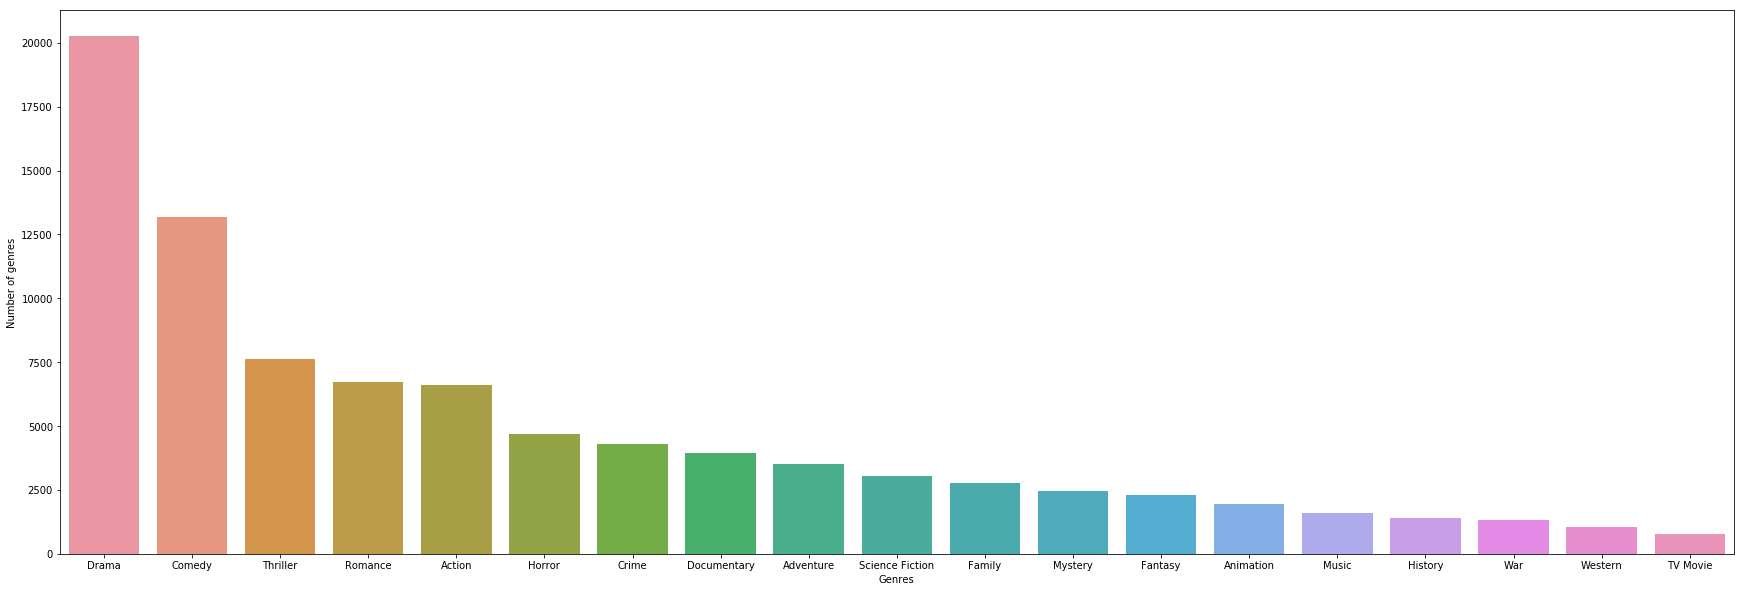

In [10]:
plot_histogram(genres,'Genres','Number of genres',invert=True)

## Frequent words in movie overview 

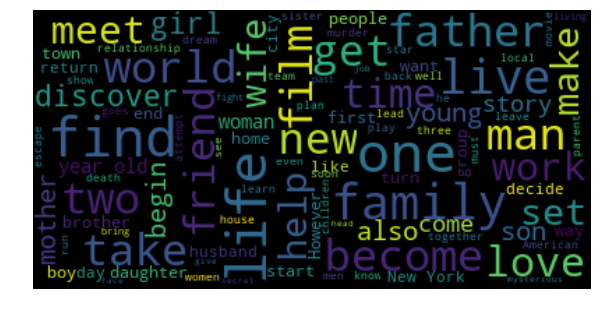

In [11]:
overview_text = get_all_text(movie_metadata,'overview')
plot_wordcloud(overview_text,(10,10))

## Frequent words in movie tagline  

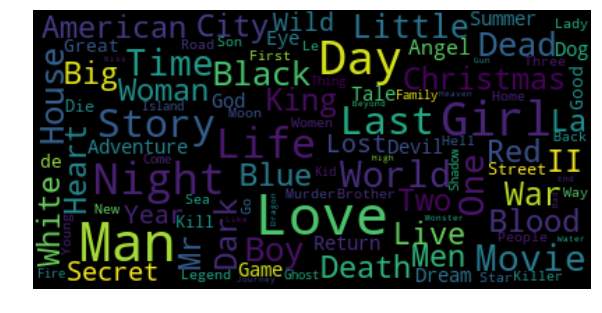

In [12]:
tagline_text = get_all_text(movie_metadata,'title')
plot_wordcloud(tagline_text,(10,10))

## Top 30 most frequent keywords  

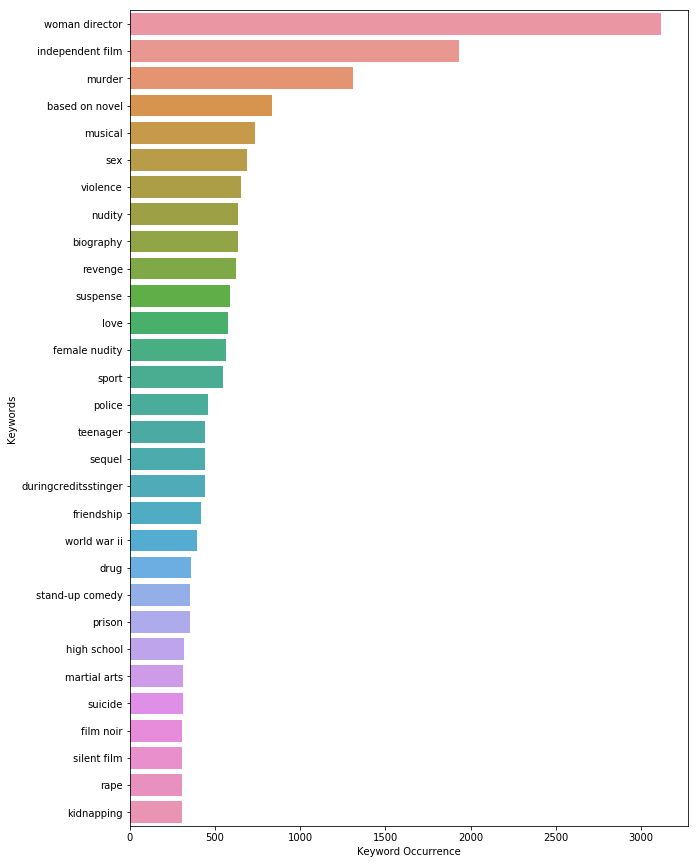

In [13]:
top_30 = most_frequent_words(frequent_keywords)
plot_histogram(top_30,'Keywords','Keyword Occurrence')

## Average Movie Popularity per genre over the years (post 2000)

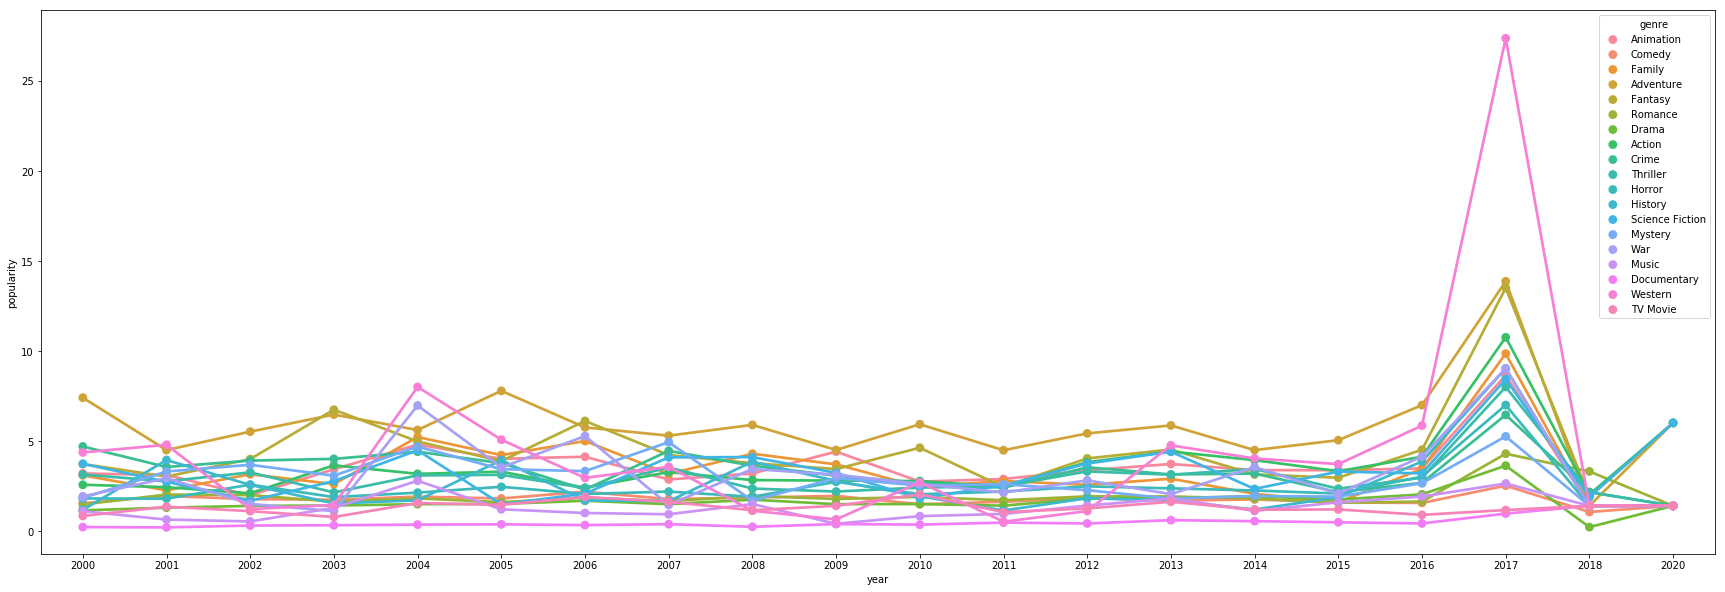

In [14]:
data = movie_metadata[movie_metadata['year'] >= 2000]
years = list(np.unique(data['year']))
plot_pointplot(data,years,list(genres.keys()),'year','genre',
               'popularity')

## Average voter rating per genre film over the years (post 2000)

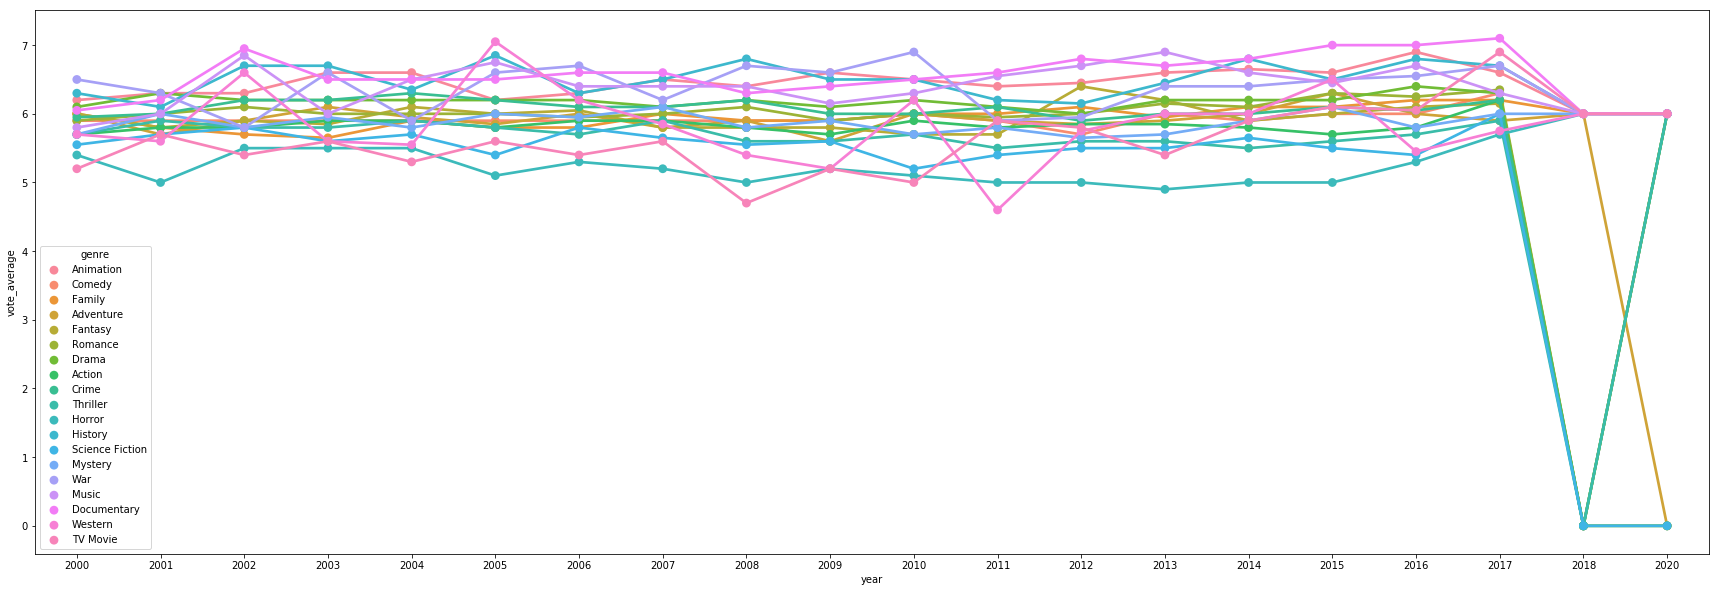

In [15]:
plot_pointplot(data,years,list(genres.keys()),'year','genre',
               'vote_average')

# Association Rule Mining

## Helper Functions 

In [16]:
def count(itemset,df):
    # Scans the dataframe to compute intersection of all the rows for which 
    # binarized attributes are all 1. The number of intersection rows is the 
    # minimum support of the itemset/transaction in the data
    intersection = np.arange(df.shape[0])
    for item in itemset:
        rows = np.where(df.loc[:,item] == 1)
        intersection = np.intersect1d(intersection,rows[0])
    return len(intersection)/df.shape[0]
        
def frequent_itemsets(df,cols,minsup=0.02):
    all_itemsets = list()
    pruned_cols = set()
    k_plus_one_itemsets = list()
    k_itemsets = list()
    map_counts = defaultdict(int)
    # For each column attribute, scans the database and prunes those 
    # attributes whose support is not atleast as big as minsup, further
    # it stores the support of each column in the dictionary
    for col in cols:
        item = frozenset([col])
        count_item = count(item,df)
        if count_item >= minsup:
            k_itemsets.append(item)
            map_counts[item] = count_item
            pruned_cols.add(col)
    all_itemsets.extend(k_itemsets)
    # While no new itemsets are generated, it loops through each
    # possible column from the pruned columns and each itemset 
    # from length-k itemsets to generate length-k+1 itemsets, 
    # finally it returns all the itemsets as well as their counts
    while(k_itemsets):
        for col in pruned_cols:
            for itemset in k_itemsets: 
                new_list = list(itemset)
                new_list.append(col)
                new_set = frozenset(new_list)
                if (col not in itemset and 
                    new_set not in map_counts and 
                    count(new_set,df) >= minsup):
                    count_set = count(new_set,df)                    
                    k_plus_one_itemsets.append(new_set)
                    map_counts[new_set] = count_set
        all_itemsets.extend(k_plus_one_itemsets)
        k_itemsets = k_plus_one_itemsets
        k_plus_one_itemsets = []
    return (all_itemsets,map_counts)

def print_counts(counts):
    for key in counts:
        print(str(key) + " -> " + str(counts[key]))

def all_possible_rules(LHS,RHS,counts,total_sup,confidence,cur_rules,df):
    # rules is where all the possible rules are stored like so [LHS,RHS] 
    # where LHS and RHS are frozensets representing the left hand side 
    # itemset and right hand side itemset of the association rule
    rules = list()
    # If length of left hand rule is bigger than right hand rule, then we generated
    # all possible combinations no need to backtrack further
    if(len(LHS) > len(RHS)):
        # For each item in left hand side frozenset, subtract it from LHS 
        # to compute itemset whose length is one less, and right itemset 
        # whose length is one greater extending from the right hand side 
        # of the rule which called the backtrack
        for item in LHS:
            rule_LHS = frozenset([item])
            rule_RHS = list(LHS - rule_LHS)
            rule_RHS.extend(list(RHS))
            rule_RHS = frozenset(rule_RHS)
        # Interchange the left hand side and right hand side to get both 
        # possible combinations of the rule
            rule1 = [rule_LHS,rule_RHS]
            rule2 = [rule_RHS,rule_LHS]
            if(rule_LHS not in counts):
                counts[rule_LHS] = count(rule_LHS,df)
            if(rule_RHS not in counts):
                counts[rule_RHS] = count(rule_RHS,df)
            if(len(rule_LHS) != 0 and 
               counts[rule_LHS] != 0 and 
               total_sup/counts[rule_LHS] >= confidence and 
               rule1 not in cur_rules):
                rules.append(rule1)
            if(len(rule_RHS) != 0 and 
               counts[rule_RHS] != 0 and
               total_sup/counts[rule_RHS] >= confidence and 
               rule2 not in cur_rules):
                rules.append(rule2)
            sub_rules = all_possible_rules(rule_LHS,rule_RHS,counts,
                                            total_sup,confidence,
                                            cur_rules,df)
            rules.extend(sub_rules)    
    return rules

def apriori(itemsets,counts,df,confidence=0.65):
    all_rules = list()
    # For each itemset only find all possible rules for that itemset if
    # its length is bigger than or equal to two because the LHS and RHS 
    # need to be of length atleast for proper association rules.
    for itemset in itemsets:
        if(len(itemset) >= 2):
            rules = all_possible_rules(itemset,{},counts,counts[itemset],
                                       confidence,all_rules,df)
            for rule in rules:
                if(rule not in all_rules):
                    all_rules.append(rule)
    return all_rules

def print_rules(rules):
    # Print all the rules with the left hand side and right hand side
    for rule in rules:
        print(str(rule[0]) + ' --> ' + str(rule[1]))

## Association Rules

In [17]:
# movie_metadata = pd.read_hdf(path+'intermediate-files/intermediate1.h5',key='df')
cols = ['adult','video']
cols.extend(list(production_companies.keys()))
cols.extend(list(frequent_keywords.keys()))
cols.extend(list(genres.keys()))
cols.extend(list(non_genres))
itemsets,counts = frequent_itemsets(movie_metadata,cols,0.005)
rules = apriori(itemsets,counts,movie_metadata)
print("Rules")
print_rules(rules)

Rules
frozenset({'martial arts'}) --> frozenset({'Action'})
frozenset({'Romance'}) --> frozenset({'Drama'})
frozenset({'dystopia'}) --> frozenset({'Science Fiction'})
frozenset({'alien'}) --> frozenset({'Science Fiction'})
frozenset({'suspense'}) --> frozenset({'Thriller'})
frozenset({'world war ii'}) --> frozenset({'Drama'})
frozenset({'biography'}) --> frozenset({'Drama'})
frozenset({'Canal+'}) --> frozenset({'Drama'})
frozenset({'friendship'}) --> frozenset({'Drama'})
frozenset({'based on novel'}) --> frozenset({'Drama'})
frozenset({'independent film'}) --> frozenset({'Drama'})
frozenset({'love'}) --> frozenset({'Drama'})
frozenset({'History'}) --> frozenset({'Drama'})
frozenset({'War'}) --> frozenset({'Drama'})
frozenset({'stand-up comedy'}) --> frozenset({'Comedy'})
frozenset({'Romance', 'Foreign'}) --> frozenset({'Drama'})
frozenset({'Romance', 'Crime'}) --> frozenset({'Drama'})
frozenset({'woman director', 'Romance'}) --> frozenset({'Drama'})
frozenset({'Romance', 'independent f

# Text Features

## Helper Functions

In [18]:
def word_count(sentence):
    ## Returns number of words in a sentence
    try:
        return len(sentence.split(" "))
    except:
        return 1
    
def char_count(sentence):
    # Returns the number of characters in a sentence
    try:
        return len(sentence)
    except:
        return 0

def compute_average_word_length(sentence):
    # Returns the average word length in a sentence
    try:
        words = sentence.split(" ")
        return sum([len(word) for word in words])/len(words)
    except:
        return 0

def count_stop_words(sentence):
    # Counts the number of commonly occuring stop words in a 
    # sentence
    try:
        words = sentence.split(" ")
        stop_words = set(stopwords.words("english"))
        return len([word for word in words if word in stop_words])
    except:
        return 0

def count_uppercase_words(sentence):
    # Counts the number of uppercase words in a sentence
    try:
        words = sentence.split(" ")
        return len([word for word in words if word.isupper()])
    except:
        return 0

def convert_to_lowercase(sentence):
    # Converts each sentence to lowercase so that it is 
    # easier to maintain consistency while doing text 
    # feature extraction
    try:
        return sentence.lower()
    except:
        return ''

def remove_punctuation(sentence):
    # Removes all the punctuation in the sentence
    try:
        sentence = sentence.replace('[\W\S]','')
        return " ".join([word for word in sentence.split(" ") if word.isalpha()])
    except:
        return ''

def remove_stop_words(sentence):
    # Removes all the commonly occuring stop words in a
    # sentence with the help of nltk library
    try:
        stop_words = set(stopwords.words("english"))
        words = sentence.split(" ")
        return " ".join([word for word in words if word not in stop_words])
    except:
        return ''

def tokenize(sentence):
    # Tokenizes each sentence using nltk word_tokenize function
    try:    
        tokens = word_tokenize(sentence)
        new_sentence = " ".join(["not" if word == "n't" else word for word in tokens])
        return new_sentence
    except:
        return ''

def stem(sentence):
    # Stems the words in a sentence using nltk's PorterStemmer
    try:
        st = PorterStemmer()
        return " ".join([st.stem(word) for word in sentence.split(" ")])
    except:
        return ''

def lemmatize(sentence):
    # Lemmatizes the words in a sentence using nltk's lemmatizer
    try:
        lem = WordNetLemmatizer()
        return " ".join([lem.lemmatize(word) for word in sentence.split(" ")])
    except:
        return ''

def preprocess_text(df,col_name,nfeatures=1000):
  # Preprocess_text is where all the features related to a sentence 
  # are added including word_count, char_count, tfidf features etc.
    df[col_name+'_word_count'] = df[col_name].apply(word_count)
    df[col_name+'_char_count'] = df[col_name].apply(char_count)
    df[col_name+'_avg_word_length'] = df[col_name].apply(compute_average_word_length)
    df[col_name+'_stop_words'] = df[col_name].apply(count_stop_words)
    df[col_name] = df[col_name].apply(convert_to_lowercase)
    df[col_name] = df[col_name].apply(remove_punctuation)
    df[col_name] = df[col_name].apply(remove_stop_words)
    df[col_name] = df[col_name].apply(tokenize) 
    df[col_name] = df[col_name].apply(stem)  
    df[col_name] = df[col_name].apply(lemmatize)  
    tf = TfidfVectorizer(max_features=nfeatures, ngram_range=(1,2), analyzer='word',
                       min_df=1, smooth_idf=True, sublinear_tf=True)
    tf_features = tf.fit_transform(df[col_name])
    tf_features_names = [col_name[0:2] + "_" + name for name in tf.get_feature_names()]
    tf_array = pd.DataFrame(tf_features.toarray(),columns=tf_features_names)
    df = pd.concat([df,tf_array],axis=1)
    df.drop([col_name],axis=1,inplace=True)
    return df

# Loding non-processed text data

In [19]:
# movie_metadata = pd.read_hdf(path+'intermediate-files/intermediate1.h5',key='df')

# Text preprocessing

In [20]:
movie_metadata = preprocess_text(movie_metadata,'overview',10000)
movie_metadata = preprocess_text(movie_metadata,'tagline',4000)
movie_metadata = preprocess_text(movie_metadata,'title',1000)
s = movie_metadata.columns.to_series()
movie_metadata.columns = s + s.groupby(s).cumcount().astype(str).replace({'0':''})

## Fill nan values 

In [21]:
null_col_list = movie_metadata.columns[movie_metadata.isnull().any()].tolist()
for col in null_col_list:
    movie_metadata = fill_with_median(movie_metadata,col)

## Save intermediate computation for later use

In [22]:
# movie_metadata.to_hdf(path+'intermediate-files/intermediate2.h5',
#                       key='df')

# Feature Extraction (Dimensionality Reduction)

In [23]:
from sklearn.utils.extmath import randomized_svd
# movie_metadata = pd.read_hdf(path+'intermediate-files/intermediate2.h5')
keys = sorted(list(genres.keys()))
labels = movie_metadata[keys]
movie_metadata = movie_metadata.drop(keys,axis=1)
movie_metadata = randomized_svd(movie_metadata.values,n_components = 200)
movie_metadata = movie_metadata[0]

## Save Feature extracted file for later use

In [24]:
# np.savetxt(path+'intermediate-files/dim-red-file.out',movie_metadata,
#            delimiter=',')
# labels.to_hdf(os.path.join(path,'intermediate-files/labels.h5'),key='df')

# Split into train/test data 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# labels = pd.read_hdf(os.path.join(path,'intermediate-files/labels.h5'),
#                      key='df')
# movie_metadata = np.loadtxt(os.path.join(path,
#                                          'intermediate-files/dim-red-file.out'),
#                             delimiter=',')
folds = 5
kfold = KFold(n_splits=folds)

# Training and Evaluation 

## Helper Functions 

In [26]:
from skmultilearn.problem_transform import BinaryRelevance,LabelPowerset,ClassifierChain
from sklearn.metrics import f1_score

def cross_validate_and_score(model,kfold,data,labels,folds=5):
    F1_score = 0
    roc_auc_score = 0
    lab = labels.values
    for train_idx,test_idx in kfold.split(data):    
        train_X, test_X = data[train_idx],data[test_idx]
        train_Y, test_Y = lab[train_idx],lab[test_idx]
        model.fit(train_X,train_Y)
        predictions = model.predict(test_X)
        F1_score += f1_score(test_Y,predictions,average='macro')
    return F1_score/folds

def print_scores(F1):
    print('F1_macro {}'.format(F1))
    
def print_search_cv_scores(clf):
    params = clf.cv_results_['params']
    scores = clf.cv_results_['mean_test_score']
    for i in range(len(params)):
        print(str(params[i]) + ' -> ' + str(scores[i]))

## Naive Bayes with BinaryRelevance

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_1 = BinaryRelevance(GaussianNB())
F1_score = cross_validate_and_score(naive_bayes_1,kfold,
                                             movie_metadata,labels,
                                             folds)
print_scores(F1_score)

## Naive Bayes with LabelPowerset

In [ ]:
# naive_bayes_2 = LabelPowerset(GaussianNB())
# F1_score = cross_validate_and_score(naive_bayes_2,kfold,
#                                              movie_metadata,labels,
#                                              folds)
# print_scores(F1_score)

## Naive Bayes with ClassifierChain

In [ ]:
# naive_bayes_3 = ClassifierChain(GaussianNB())
# F1_score = cross_validate_and_score(naive_bayes_3,kfold,
#                                     movie_metadata,labels,
#                                     folds)
# print_scores(F1_score)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings 

warnings.filterwarnings('ignore')
params = {'n_estimators':[20,50,100],
          'max_features':[15,20,25],
          'max_depth':[10,15,20]}
clf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                         param_distributions=params,
                         cv=5,n_iter=6,n_jobs=-1,
                         scoring='f1_macro')
clf.fit(movie_metadata,labels.values)

## Cross Validation Scores 

In [ ]:
print_search_cv_scores(clf)